# **Water Quality Analysis**

## Objectives

#### The objectives of this analysis is to measure and gain an insight into the water quality in terms of the following:

* Water potability

* pH levels

* Turbidity

* Conductivity

* Organic Carbon

* Trihalomethanes

## Inputs

#### To perform this analysis I will require the  following:

* water_potability_cleaned dataset.csv

* Pandas

* Seaborn

* Matplotlib

## Outputs

* The outputs will show informative visualisations and accounts of the insights for each respective parameter.





---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\rayaf\\OneDrive\\Documents\\water_quality\\water_quality_analysis\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\rayaf\\OneDrive\\Documents\\water_quality\\water_quality_analysis'

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#### The water potability cleaned dataset has been loaded.

In [5]:
df = pd.read_csv('../water_quality_analysis/data/cleaned_data/water_potability_cleaned.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
1,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
2,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
3,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
4,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


### Potability

In [6]:
# Use the same variable name as when loading
total_samples = len(df)
potable_samples = df['Potability'].sum()
potable_percentage = (potable_samples / total_samples) * 100

print(f"Total samples: {total_samples}")
print(f"Potable samples: {potable_samples}")
print(f"Percentage of potable water: {potable_percentage:.2f}%")


Total samples: 2011
Potable samples: 811
Percentage of potable water: 40.33%


#### As can be seen from the results above, only 40% of water is drinkable.

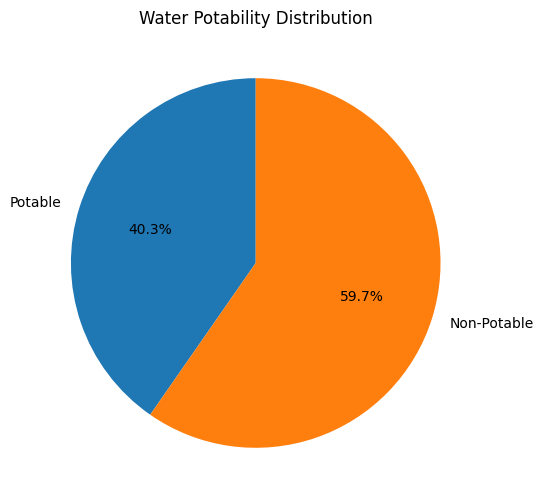

In [7]:


# Data
labels = ['Potable', 'Non-Potable']
sizes = [811, 2011 - 811]  # potable and non-potable counts

# Create pie chart
plt.figure(figsize=(6,6))
plt.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%',  # Show percentages with 1 decimal
    startangle=90       # Rotate so first slice starts at the top
)
plt.title('Water Potability Distribution')
plt.show()


#### Advanced filtration, UV treatment, and boiling may result in a greater percentage of water drinkable.

### Measuring pH Levels

Average pH of potable water: 7.11


<Axes: xlabel='ph', ylabel='Count'>

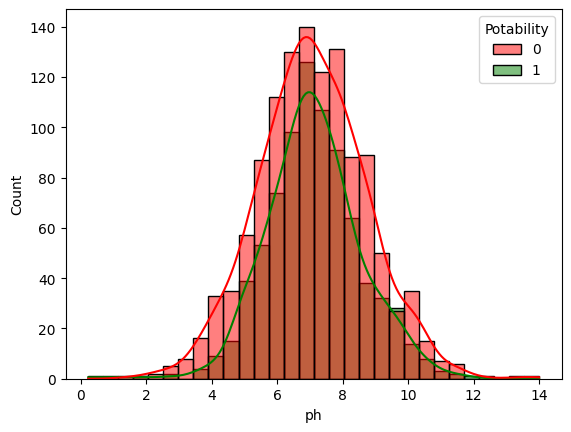

In [10]:
average_ph = df[df['Potability'] == 1]['ph'].mean()
print(f"Average pH of potable water: {average_ph:.2f}")
sns.histplot(data=df, x='ph', hue='Potability', bins=30, kde=True, palette={0: 'red', 1: 'green'})

#### The average pH level in potable water is 7.11 this is within WHO guidelines. There is a percentage where the water is alkaline and above 8.5 will have a bitter taste.

### Turbidity

In [12]:
potable_turbidity_average = df[df['Potability'] == 1]['Turbidity'].mean()
print(f"Average turbidity of potable water: {potable_turbidity_average:.2f}")



Average turbidity of potable water: 3.99


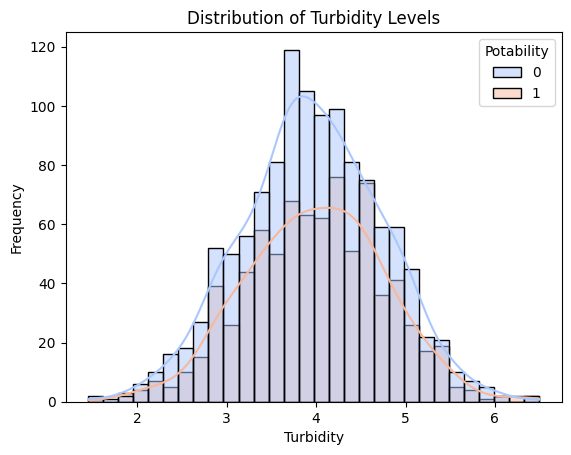

In [14]:
sns.histplot(data=df, x='Turbidity', hue='Potability', kde=True, palette='coolwarm', bins=30)
plt.title('Distribution of Turbidity Levels')
plt.xlabel('Turbidity')
plt.ylabel('Frequency')
plt.show()


#### The average turbidity is 3.99 NTU and this slightly higher level for drinking water. To improve this filtration is required to remove suspended solids.

#### Water ulitity companies in the UK are likely to use coagulation and sedimentations to settle particles before disinfection.

#### Then through source protection, this prevent runoff or erosion that will result in an increase in turbidity.

### Conductivity

In [15]:
conductivity_means = df.groupby('Potability')['Conductivity'].mean().reset_index()
conductivity_means.columns = ['Potability', 'Mean Conductivity']

C:\Users\rayaf\AppData\Local\Temp\ipykernel_30656\3175168886.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=conductivity_means, x='Potability', y='Mean Conductivity', palette='coolwarm')


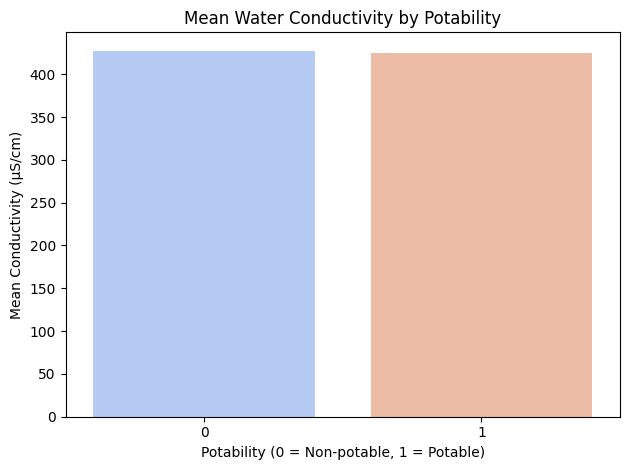

In [16]:
sns.barplot(data=conductivity_means, x='Potability', y='Mean Conductivity', palette='coolwarm')
plt.title('Mean Water Conductivity by Potability')
plt.xlabel('Potability (0 = Non-potable, 1 = Potable)')
plt.ylabel('Mean Conductivity (µS/cm)')
plt.tight_layout()
plt.show()


#### The UK Drinking Water Inspectorate (DWI) does not have a strict conductivity limit. The mean for the both water types is the nearly the same.

### Organic Carbon

In [18]:
potable_df = df[df['Potability'] == 1]
mean_organic_carbon = potable_df['Organic_carbon'].mean()
print(f"Average organic carbon of potable water: {mean_organic_carbon:.2f}")

Average organic carbon of potable water: 14.29


#### The avarage level of 14.29 is too high for UK standards. In the UK the acceptable level is <5mg/L, this outcome will require water treatment.

C:\Users\rayaf\AppData\Local\Temp\ipykernel_30656\1123363259.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Potability', y='Organic_carbon', palette='pastel')


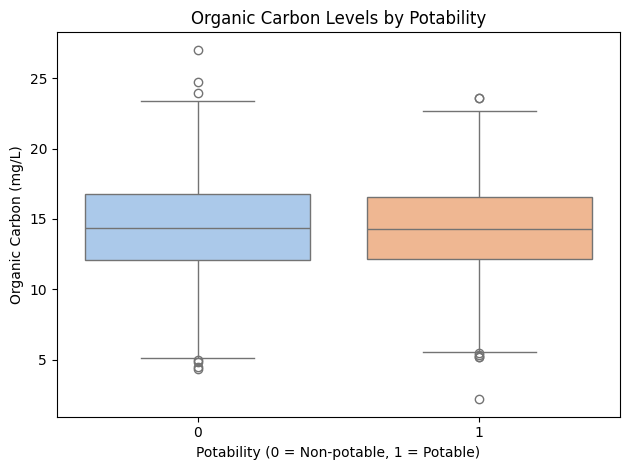

In [20]:
sns.boxplot(data=df, x='Potability', y='Organic_carbon', palette='pastel')

# Add labels and title
plt.title('Organic Carbon Levels by Potability')
plt.xlabel('Potability (0 = Non-potable, 1 = Potable)')
plt.ylabel('Organic Carbon (mg/L)')
plt.tight_layout()
plt.show()



#### The boxplot above shows that the meadian value is too high and the values by the lower whiskers still show a level that is unacceptable for the UK.

In [24]:
from plotly.subplots import make_subplots
import plotly.graph_objs as go

# Create subplots: 2 rows, 2 columns
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{'type':'domain'}, {'type':'xy'}],
           [{'type':'xy'}, {'type':'xy'}]],  # Pie chart is domain type
    subplot_titles=(
        "Water Potability Distribution",
        "pH Distribution by Potability",
        "Turbidity Distribution by Potability",
        "Organic Carbon by Potability"
    )
)

# Pie chart for Potability
fig.add_trace(
    go.Pie(
        labels=labels,
        values=sizes,
        hole=0.4,
        showlegend=False
    ),
    row=1, col=1
)

# Histogram for pH by Potability
for pot, color in zip([0, 1], ['red', 'green']):
    fig.add_trace(
        go.Histogram(
            x=df[df['Potability'] == pot]['ph'],
            name=f'Potability {pot}',
            opacity=0.7,
            marker_color=color,
            nbinsx=30,
            showlegend=(pot == 0)
        ),
        row=1, col=2
    )

# Histogram for Turbidity by Potability
for pot, color in zip([0, 1], ['blue', 'orange']):
    fig.add_trace(
        go.Histogram(
            x=df[df['Potability'] == pot]['Turbidity'],
            name=f'Potability {pot}',
            opacity=0.7,
            marker_color=color,
            nbinsx=30,
            showlegend=False
        ),
        row=2, col=1
    )

# Boxplot for Organic Carbon by Potability
fig.add_trace(
    go.Box(
        y=df[df['Potability'] == 0]['Organic_carbon'],
        name='Non-Potable',
        marker_color='red'
    ),
    row=2, col=2
)
fig.add_trace(
    go.Box(
        y=df[df['Potability'] == 1]['Organic_carbon'],
        name='Potable',
        marker_color='green'
    ),
    row=2, col=2
)

fig.update_layout(
    height=900, width=1200,
    title_text="Water Quality Dashboard",
    barmode='overlay'
)

fig.update_xaxes(title_text="pH", row=1, col=2)
fig.update_xaxes(title_text="Turbidity", row=2, col=1)
fig.update_yaxes(title_text="Count", row=1, col=2)
fig.update_yaxes(title_text="Count", row=2, col=1)
fig.update_yaxes(title_text="Organic Carbon (mg/L)", row=2, col=2)

fig.show()


#### The interactive dashboard above provides insights into the quality of this water data. The water utility companies are likely to treat,filter and protect water sources to increase the supply of drinkable water to our homes.

---

# Section 2

Section 2 content

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)
